## Decay Rates

In [1]:
import os,sys
sys.path.append('./bubbles_codes/')
from plotting import *
from bubble_tools import *
from experiment import *
from celluloid import Camera


In [2]:
# standardize plots
lsl = lambda tmp: ('-' if tmp%4==0 else '-.' if tmp%4==1 else '--' if tmp%4==3 else ':')


In [3]:
if True:
    tmp = 0
    phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])

    print(m2(lamb)**0.5, temp/m2(lamb)**0.5)

    philist = np.linspace(0.75*np.pi, 2.25*np.pi, 10000)

    fig, ax = plt.subplots(1, 1, figsize=(7, 4))
    ax.plot(philist, V(philist, lamb), label=r'$\lambda=$'+str(lamb))
    ax.plot(right_Vmax.x, V(right_Vmax.x, lamb), 'go')
    for nn in np.linspace(0, 5, 6):
        ax.plot(right_Vmax.x + nn*sigmafld, V(right_Vmax.x + nn*sigmafld, lamb), 'o', label=int(nn))

    ax.set_xlabel(r'$\bar{\phi}$')
    ax.set_ylabel(r'$V_0^{-1} \; \phi_0^2 \; V(\bar{\phi},\; \lambda)$')
  #  ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
  #  ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
  #  ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
    plt.grid(); plt.legend()
    plt.savefig('./plots/potential.pdf', rasterize=True)
    plt.show()


0.1 0.8999999999999999


ImportError: Cannot load backend 'Qt5Agg' which requires the 'qt' interactive framework, as 'headless' is currently running

In [ ]:
if False:
    for tmp in range(len(tempList)):
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        def fun(y, x):
            Φ, Π = y
            #dydx = [Π, -Π/x+(np.sin(Φ) + 0.5*lamb**2.*np.sin(2.*Φ))*4.*nu]
            # no friction term in thermal case
            dydx = [Π, +(np.sin(Φ) + 0.5*lamb**2.*np.sin(2.*Φ))*4.*nu]
            return dydx

        #y0 = [5.69219082899233042025, 0.] # with friction
        y0 = [4.823729806624, 0.] # supercrit_instanton_file
        #y0 = [4.823729806625, 0.] # instanton_file

        x     = np.linspace(0, lenLat, 1000)
        xplot = np.linspace(np.pi*0.8, 2.*np.pi, 1000)
        sol   = odeint(fun, y0, x)

        plt.plot(x, sol[:, 0], ls='-', label=r'$\phi(x)$')
        plt.axhline(np.pi, ls=':', color='darkgray')
        plt.legend(); plt.show()

        plt.plot(xplot, Vinv(xplot, lamb), label='V', linewidth='1', alpha=0.3)
        plt.plot(sol[:, 0], Vinv(sol[:, 0], lamb))
        plt.legend(); plt.show()

        ind  = np.argmin(np.abs(sol[:,0] - np.pi)); print(ind, sol[ind,0])
        inst = np.ones(nLat//2+1) * phieq
        inst[:ind+1] = sol[:ind+1, 0]
        inst = np.concatenate((inst[::-1],inst[1:-1]))
        print(np.argmax(inst))
        
        #np.save(supercrit_instanton_file(*exp_params), inst)

        plt.plot(np.arange(nLat)-nLat//2, inst); plt.show()
        print('Instanton saved.')

In [ ]:
if True:
    titls = [r'$\rm Critical$', r'$\rm Sub-critical$']

    super_instanton_sim = extract_data(nLat, supercrit_instanton_sim_file(*exp_params[:-1]))
    instanton_sim = extract_data(nLat, instanton_sim_file(*exp_params[:-1]))

    tdecay = max(0, np.shape(super_instanton_sim)[1] - nLat//2)
    crit_thresh = right_Vmax.x + 5.*sigmafld
    super_instanton_sim, crit_rad = centre_bubble(super_instanton_sim, tdecay, phieq, crit_thresh)
    super_instanton_sim = remove_collisions(super_instanton_sim, phieq)

    for tmp in range(len(tempList)):
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

     #   np.save(supercrit_instanton_file(*exp_params), super_instanton_sim[0,0,:])
     #   np.save(instanton_file(*exp_params), instanton_sim[0,0,:])

    print('Decay time standard, radius:', tdecay, crit_rad)
    super_bubble = super_instanton_sim[0, 50:nLat//3+51, nLat//3:2*nLat//3+1]
    bubble       = instanton_sim[0, 50:nLat//3+51, nLat//3:2*nLat//3+1]

    nN, nT      = np.shape(super_bubble)
    tcen, xcen  = find_nucleation_center(super_bubble, phieq, crit_thresh, crit_rad//3)

    tl,tr,xl,xr = -tcen, nT-1-tcen, -xcen, nN-1-xcen
    exts1       = np.array([xl, xr, tl, tr])*dx*np.sqrt(m2(lamb))
    tt1, xx1    = np.linspace(tl, tr, nT)*dx*np.sqrt(m2(lamb)), np.linspace(xl, xr, nN)*dx*np.sqrt(m2(lamb))
    ttt1, xxx1  = np.meshgrid(tt1, xx1)

    tl,tr,xl,xr = 0, nT-1, -xcen, nN-1-xcen
    exts2       = np.array([xl, xr, tl, tr])*dx*np.sqrt(m2(lamb))
    tt2, xx2    = np.linspace(tl, tr, nT)*dx*np.sqrt(m2(lamb)), np.linspace(xl, xr, nN)*dx*np.sqrt(m2(lamb))
    ttt2, xxx2  = np.meshgrid(tt2, xx2)

    fig, ax = plt.subplots(1, 2, figsize = (11,4))
    ax[0].contour(xxx1, ttt1, super_bubble.T, levels=7, aspect='auto', interpolation='none', extent=exts1, origin='lower', colors='k', linewidths=0.5)
    im0 = ax[0].imshow(super_bubble, aspect='auto', interpolation='none', extent=exts1, origin='lower', cmap='RdBu')
    clb0 = plt.colorbar(im0, ax = ax[0], ticks = mticker.MultipleLocator(np.pi/2), format = mticker.FuncFormatter(multiple_formatter()))
    clb0.ax.set_title(r'$\bar{\phi}$')

    ax[1].contour(xxx2, ttt2, bubble.T, levels=10, aspect='auto', interpolation='none', extent=exts2, origin='lower', colors='k', linewidths=0.5)
    im1 = ax[1].imshow(bubble, aspect='auto', interpolation='none', extent=exts2, origin='lower', cmap='RdBu')
    clb1 = plt.colorbar(im1, ax = ax[1], ticks = mticker.MultipleLocator(np.pi/2), format = mticker.FuncFormatter(multiple_formatter()))
    clb1.ax.set_title(r'$\bar{\phi}$')

    for ai, aa in enumerate(ax):
        aa.legend(title=titls[ai], loc=4, fancybox=True, frameon=True, framealpha=0.8)
        aa.grid(ls=':', color='darkgray', alpha=0.5)
        aa.xaxis.set_minor_locator(MultipleLocator(1))
        aa.yaxis.set_minor_locator(MultipleLocator(1))
      #  aa.set_xlabel(r'$\phi_0^{-1} \sqrt{V_0} \; r$')
      #  aa.set_ylabel(r'$\phi_0^{-1} \sqrt{V_0} \; t$')
        aa.set_xlabel(r'$m \; r$')
        aa.set_ylabel(r'$m \; t$')
        aa.yaxis.set_ticks_position('both')
        aa.xaxis.set_ticks_position('both')
        aa.tick_params(which='both', axis="y", direction="in")
        aa.tick_params(which='both', axis="x", direction="in")
    plt.savefig('./plots/bare_spheleron.pdf', dpi=500, rasterize=True)
    plt.show()
    
    tmp = 0
    phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])
    print(*exp_params)

    instanton = np.load(instanton_file(*exp_params))# - np.pi
    supercritinstanton = np.load(supercrit_instanton_file(*exp_params))# - np.pi
    print(np.shape(instanton), np.shape(supercritinstanton))

    xmin, xmax = nLat//3, nLat*2//3
    #plt.plot(xlist[xmin:xmax], instanton[xmin:xmax])
    #plt.plot(xlist[xmin:xmax], supercritinstanton[xmin:xmax])
    plt.plot(xlist[xmin:xmax], supercritinstanton[xmin:xmax] - instanton[xmin:xmax])
    plt.plot(xlist[xmin:xmax], supercritinstanton[xmin:xmax] - super_instanton_sim[0,0,xmin:xmax])
    plt.plot(xlist[xmin:xmax], instanton[xmin:xmax] - instanton_sim[0,0,xmin:xmax])
    plt.show()

    crit_soln_f90 = '(/'
    for ind, iii in enumerate(instanton):
        crit_soln_f90 = crit_soln_f90 + str(iii)
        if ind != len(instanton)-1:
            crit_soln_f90 = crit_soln_f90 + ', '
    crit_soln_f90 += '/)'
    #print(crit_soln_f90)

In [ ]:
if False:
    tmp = 5
    phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])

    undecayed_sims = np.load(sims_notdecayed_file(*exp_params, minSim, maxSim, nTimeMAX))
    print(undecayed_sims[:,0])

    decay_times  = np.load(decay_times_file(*exp_params, minSim, maxSim, nTimeMAX))
    
    minDecTime  = 4*nLat
    alltimes    = decay_times[:,1]
    simList2Do  = decay_times[alltimes>=minDecTime, 0]
    print(simList2Do)

  #  sims_decayed   = np.load(sims_decayed_file(*exp_params, minSim, maxSim, nTimeMAX))

    choose = random.sample(undecayed_sims[:,0].tolist(), 1)
    for sim in choose:
        path2sim = sim_location(*exp_params, sim)
        
        real, cho = get_realisation(nLat, sim, phieq, path2sim)
        nC, nT, nN = np.shape(real)
        print('Sim, nT, outcome', sim, nT, cho)

        bubble = real[0,:]#nT-3*nLat//4]
        nT, nN = np.shape(bubble)
        ax1 = simple_imshow(bubble, [0,nT,0,nN], 'Simulation '+str(sim))
        plt.show()
        
        fftbubble = np.fft.fft2(bubble)
        nT, nN = np.shape(fftbubble)
        #fftbubble = fftbubble[:nT//2,:nN//2]
        fftbubble[:, nN*4//10:nN*6//10+1] = 0.
        ax2 = simple_imshow(np.log(fftbubble.real), [0,nT,0,nN], 'Simulation '+str(sim))

        bubble2 = np.fft.ifft2(fftbubble)
        nT, nN = np.shape(bubble2)
        ax3 = simple_imshow(bubble2.real, [0,nT,0,nN], 'Simulation '+str(sim))
        ax4 = simple_imshow(bubble2.imag, [0,nT,0,nN], 'Simulation '+str(sim))

        ax5 = simple_imshow(bubble2.real-bubble, [0,nT,0,nN], 'Simulation '+str(sim))
        
        if False:
#        if sim in sims_decayed[:,0]:
            path2CLEANsim = clean_sim_location(*exp_params, sim)
            real, sim, tdecay, outcome = np.load(path2CLEANsim)

            bubble = real[0,-nLat:]
            nT, nN = np.shape(bubble)
            simple_imshow(bubble, [0,nT,0,nN], 'Simulation '+str(sim))
            print('Sim, outcome0, outcome1, tdecay', sim, outcome, cho, tdecay)


In [ ]:
# Classify decays
fig, ax = plt.subplots(1, len(tempList), figsize = (18,5))
plt.style.use('seaborn-whitegrid') # nice and clean grid
cols = cycle(['purple', 'forestgreen', 'orange', 'blue'])

for tmp in range(len(tempList)):
    phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])

    undecayed_sims = np.load(sims_notdecayed_file(*exp_params, minSim, maxSim, nTimeMAX))
    decayed_sims = np.load(sims_decayed_file(*exp_params, minSim, maxSim, nTimeMAX))
    decay_times = np.load(decay_times_file(*exp_params, minSim, maxSim, nTimeMAX))

    outcomes = decayed_sims[:,1]; print(len(outcomes))

    labs = labl(lamb, phi0, temp)
    ax[tmp].hist(outcomes, density=True, bins=2, rwidth=0.8, color=next(cols), alpha=0.9, linewidth=0.5, label=labs)
    ax[tmp].set_xlabel(r'$2\pi \quad\quad 0$')
    ax[tmp].set_ylabel('PDF')
    ax[tmp].legend(loc=4, fancybox=True, frameon=True, framealpha=0.75, borderpad=0.3)
plt.savefig('./plots/vacuum_choice.pdf', rasterize=True); plt.show()


In [4]:
bubbleList, velocitesList, instantonList, tmpList, fldcritList, tcritList, encritList = [], [], [], [], [], [], []
for tmp in [0,1,2,3]:
    phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])

    bubbleList.append(np.load(average_file(*exp_params)))
    velocitesList.append(np.load(velocities_file(*exp_params)))
    instantonList.append(np.load(supercrit_instanton_file(*exp_params)))
    tmpList.append(tmp)
    fldcritList.append(np.load(critfield_file(*exp_params)))
    tcritList.append(np.load(crittimes_file(*exp_params)))
    encritList.append(np.load(critenerg_file(*exp_params)))


In [5]:
encritList

[array(0.22429189), array(0.22378238), array(0.22477306), array(0.22621002)]

In [6]:
temp

0.12

fit params: [-9.31335247e-05 -2.46163571e-02] , # bubbles: 4000
fit params: [-0.00030357 -0.07452619] , # bubbles: 4000
fit params: [-0.00050708 -0.28046135] , # bubbles: 4000
fit params: [-0.00091535 -0.5870397 ] , # bubbles: 4000
fit params: [-1.10932673e-03 -1.14881870e+00] , # bubbles: 4000
fit params: [-1.62656637e-03 -1.63983074e+00] , # bubbles: 4000


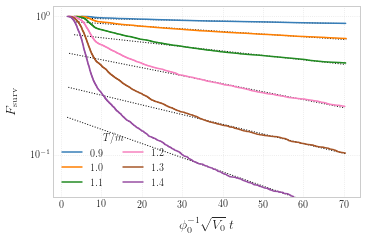

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (5.5,3.5))
gammas1 = np.zeros((len(tempList), 2))
for tmp in range(len(tempList)):
#    if tmp>4: break

    phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])
    labss = r'${}$'.format(round(temp/np.sqrt(m2(lamb)),1))#labl(lamb, phi0, temp)

    decay_times = np.load(decay_times_file(*exp_params, minSim, maxSim, nTimeMAX))
    decay_times = np.sort(decay_times[:,1])
    decay_times = decay_times[decay_times < nLat]
    ndcys = maxSim - minSim

    if tmp==0: frmin, frmax = 0.01, 0.95
    elif tmp==1: frmin, frmax = 0.01, 0.9
    elif tmp==2: frmin, frmax = 0.01, 0.65
    elif tmp==3: frmin, frmax = 0.01, 0.4
    elif tmp==4: frmin, frmax = 0.01, 0.2
    elif tmp==5: frmin, frmax = 0.01, 0.1

    tmin = decay_times[np.argmin(np.abs(survive_prob(decay_times, ndcys) - frmax))]
    tmax = decay_times[np.argmin(np.abs(survive_prob(decay_times, ndcys) - frmin))]
    
    jfit_times = lin_fit_times(decay_times, ndcys, tmin, tmax)
    gammas1[tmp] = np.array([temp, -jfit_times[0]])
    print('fit params:', jfit_times, ', # bubbles:', ndcys)

    ax.plot(decay_times*dx2plot, np.exp(get_line(decay_times, *jfit_times)), ls=':', lw=1, color='k')
    ax.plot(decay_times*dx2plot, survive_prob(decay_times, ndcys), ls='-', label=labss)

ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_xlim(1, 100)
ym,yM = ax.get_ylim()
ax.set_ylim(0.05, yM)

ax.set_ylabel(r'$F_{\rm surv}$')
ax.set_xlabel(r'$\phi_0^{-1} \sqrt{V_0} \; t$')
ax.legend(title=r'$T/m$', ncol=2, loc=3)

plt.grid(True, ls=':', alpha=0.5)
plt.savefig('./plots/vacuum_decayrates.pdf')
plt.show()

fit params: [-0.00045595  0.03925183] , # bubbles: 4000
fit params: [-0.00192078  0.16202241] , # bubbles: 4000
fit params: [-0.0039931   0.30283041] , # bubbles: 4000
fit params: [-0.00729581  0.48271882] , # bubbles: 4000
fit params: [-0.01083804  0.59156819] , # bubbles: 4000
fit params: [-0.01469839  0.66602282] , # bubbles: 4000


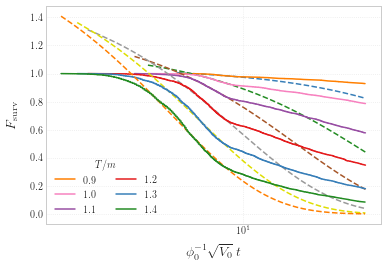

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (6,4))
gammas2 = np.zeros((len(tempList), 2))
for tmp in range(len(tempList)):
    phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])
    labss = r'${}$'.format(round(temp/np.sqrt(m2(lamb)),1))#labl(lamb, phi0, temp)

    decay_times = np.load(decay_times_file(*exp_params, minSim, maxSim, nTimeMAX))
    decay_times = np.sort(decay_times[:,1])
    decay_times = decay_times[decay_times < nLat//2]
    ndcys = maxSim - minSim

    if tmp==0: frmin, frmax = 0.98, 0.99
    elif tmp==1: frmin, frmax = 0.95, 0.99
    elif tmp==2: frmin, frmax = 0.82, 0.95
    elif tmp==3: frmin, frmax = 0.65, 0.95
    elif tmp==4: frmin, frmax = 0.5, 0.95
    elif tmp==5: frmin, frmax = 0.4, 0.95

    tmin = decay_times[np.argmin(np.abs(survive_prob(decay_times, ndcys) - frmax))]
    tmax = decay_times[np.argmin(np.abs(survive_prob(decay_times, ndcys) - frmin))]
    
    try: jfit_times = lin_fit_times(decay_times, ndcys, tmin, tmax)
    except: continue

    jfit_times = lin_fit_times(decay_times, ndcys, tmin, tmax)
    gammas2[tmp] = np.array([temp, -jfit_times[0]])
    print('fit params:', jfit_times, ', # bubbles:', ndcys)

    ax.plot(decay_times*dx2plot, np.exp(get_line(decay_times, *jfit_times)), ls='--')
    ax.plot(decay_times*dx2plot, survive_prob(decay_times, ndcys), ls='-', label=labss)

#ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylabel(r'$F_{\rm surv}$')
ax.set_xlabel(r'$\phi_0^{-1} \sqrt{V_0} \; t$')
ax.legend(title=r'$T/m$', ncol=2, loc=3)

plt.grid(True, ls=':', color='lightgray', alpha=0.5)
plt.savefig('./plots/vacuum_decayrates.pdf')
plt.show()

fit params: [-8.03430694e-05 -3.87740774e-01] , # bubbles: 4000
fit params: [-2.10110517e-04 -5.92888898e-01] , # bubbles: 4000
fit params: [-4.44626431e-04 -8.55219869e-01] , # bubbles: 4000
fit params: [-8.00746727e-04 -1.03508762e+00] , # bubbles: 4000
fit params: [-0.00204148 -0.975935  ] , # bubbles: 4000


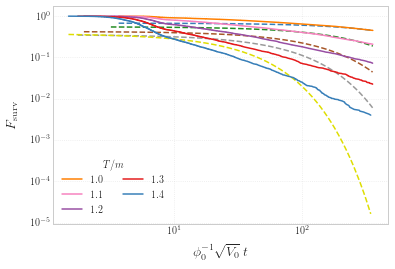

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (6,4))
gammas3 = np.zeros((len(tempList), 2))
for tmp in range(len(tempList)):
    phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])
    labss = r'${}$'.format(round(temp/np.sqrt(m2(lamb)),1))#labl(lamb, phi0, temp)

    decay_times = np.load(decay_times_file(*exp_params, minSim, maxSim, nTimeMAX))
    decay_times = np.sort(decay_times[:,1])
    ndcys = maxSim - minSim

    frmin, frmax = 0.01, 0.5

    tmin = decay_times[np.argmin(np.abs(survive_prob(decay_times, ndcys) - frmax))]
    tmax = decay_times[np.argmin(np.abs(survive_prob(decay_times, ndcys) - frmin))]
    
    try: jfit_times = lin_fit_times(decay_times, ndcys, tmin, tmax)
    except: continue

    jfit_times = lin_fit_times(decay_times, ndcys, tmin, tmax)
    gammas3[tmp] = np.array([temp, -jfit_times[0]])
    print('fit params:', jfit_times, ', # bubbles:', ndcys)

    ax.plot(decay_times*dx2plot, np.exp(get_line(decay_times, *jfit_times)), ls='--')
    ax.plot(decay_times*dx2plot, survive_prob(decay_times, ndcys), ls='-', label=labss)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylabel(r'$F_{\rm surv}$')
ax.set_xlabel(r'$\phi_0^{-1} \sqrt{V_0} \; t$')
ax.legend(title=r'$T/m$', ncol=2, loc=3)

plt.grid(True, ls=':', color='lightgray', alpha=0.5)
plt.savefig('./plots/vacuum_decayrates.pdf')
plt.show()

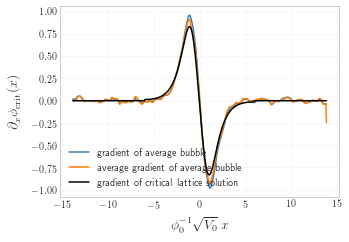

In [12]:
tmp = tmpList[0]
phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)

instanton = instantonList[tmp]
gradinst  = (np.roll(instanton,-1) - instanton)/dx2plot

testgrd = fldcritList[tmp][-1,:]*dx/dx2plot

testfld = fldcritList[tmp][0,:]
testfld = (np.roll(testfld,-1) - testfld)/dx2plot

xtest = (np.arange(nLat) - nLat//2) * dx2plot
cds   = np.array(np.linspace(nLat//2-len(testgrd)//2, nLat//2+len(testgrd)//2, len(testgrd)), dtype='int')

fig, ax = plt.subplots(1, 1, figsize = (5,3.5))
ax.plot(xtest[cds], testgrd, ls='-', label='gradient of average bubble')
ax.plot(xtest[cds], testfld, ls='-', label='average gradient of average bubble')
ax.plot(xtest[cds], gradinst[cds], ls='-',color='k', label='gradient of critical lattice solution')

ax.legend()
ax.set_ylabel(r'$\partial_x \phi_{\rm crit}(x)$')
ax.set_xlabel(r'$\phi_0^{-1} \sqrt{V_0} \; x$')
plt.grid(True, ls=':', color='lightgray', alpha=0.5)
plt.show()

No handles with labels found to put in legend.


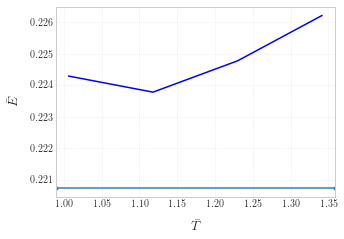

In [13]:
tmp = 0
instanton = instantonList[tmp]
gradinst = (np.roll(instanton,-1) - instanton)/dx
esph = np.sum(0.5*gradinst**2. + V(instanton, lamb) - V(phieq, lamb))

encrit_phys = encritList# * phi0List[tmpList]**2.

fig, ax = plt.subplots(1, 1, figsize = (5,3.5))
ax.plot(tempList[tmpList]/(4.*nu)**0.5, encritList, color='b')
ax.axhline(esph, marker='o', ms=3)

ax.set_ylabel(r'$\bar{E}$')
ax.set_xlabel(r'$\bar{T}$')
ax.legend()
plt.grid(True, ls=':', color='lightgray', alpha=0.5)
plt.savefig('./plots/inverse_bounce.pdf')
plt.show()

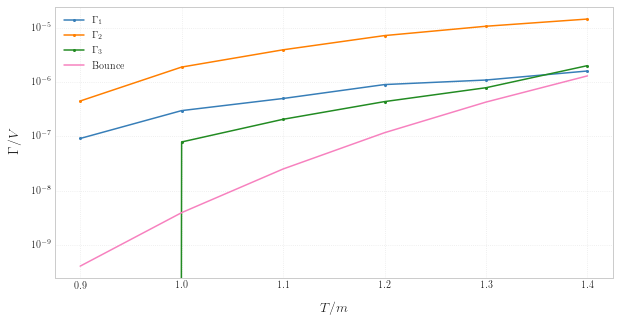

In [14]:
temprange = np.linspace(tempList[0], tempList[-1], 100)

instanton = instantonList[tmp]
gradinst  = (np.roll(instanton,-1) - instanton)/dx
esph = np.trapz(0.5*gradinst**2. + V(instanton, lamb) - V(phieq, lamb), dx=dx)

pref = 1

diffen = 2*np.pi*phi0**2.
bounce = esph * diffen / tempList

fig, ax = plt.subplots(1, 1, figsize = (10,5))

ax.plot(tempList/m2(lamb)**0.5, gammas1[:,1]/nLat, marker='o', ms=2, label=r'$\Gamma_1$')
ax.plot(tempList/m2(lamb)**0.5, gammas2[:,1]/nLat, marker='o', ms=2, label=r'$\Gamma_2$')
ax.plot(tempList/m2(lamb)**0.5, gammas3[:,1]/nLat, marker='o', ms=2, label=r'$\Gamma_3$')
ax.plot(tempList/m2(lamb)**0.5, pref * np.sqrt(bounce)*np.exp(-bounce), label=r'$\rm Bounce$')

ax.set_ylabel(r'$\Gamma/V$')
ax.set_xlabel(r'$T/m$')
ax.legend()
ax.set_yscale('log')
plt.grid(True, ls=':', color='lightgray', alpha=0.5)
plt.savefig('./plots/gamma_vs_temp.pdf')
plt.show()

In [15]:
if False:
    for tmp in range(len(tempList)):
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        # 0 for field; 1 for momentum 
        find = 0
        # modes to plot:
        aa, bb = 1, knyq-1
        labs = labl(lamb, phi0, temp)
        psth = pspec(lamb, phi0, temp)[aa:bb]

        ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, 2000))
        ALL_powspec2 = np.load(powspec_tlist_file(*exp_params, 2000, maxSim))
        tlist, PSfld1, PSfld2 = ALL_powspec1[0], ALL_powspec1[1], ALL_powspec2[1]

        fig, ax = plt.subplots(1,1, figsize = (8,4))
        camera = Camera(fig)
        for tind, tt in enumerate(tlist):
            if tt>nLat*4.5: break

            avPSfld1 = np.nanmean(PSfld1[:, find, tind, :], axis=0)
            avPSfld2 = np.nanmean(PSfld2[:, find, tind, :], axis=0)
            avPSfld  = np.nanmean(np.array([avPSfld1[:], avPSfld2[:]]), axis=0)
            slice = plt.plot(klist[aa:bb], avPSfld[aa:bb]/psth, ls='-', color='purple')

            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.set_ylabel(r'$P(k)$')
            ax.set_xlabel(r'$k$')
            ax.legend(slice, [f't = {tt}'], loc=1, title=labs)
            camera.snap()
        animation = camera.animate(interval = 0.05);
        animation.save('./plots/animation_cut_PS'+batch_params(*exp_params)+'.gif', writer = 'imagemagick')


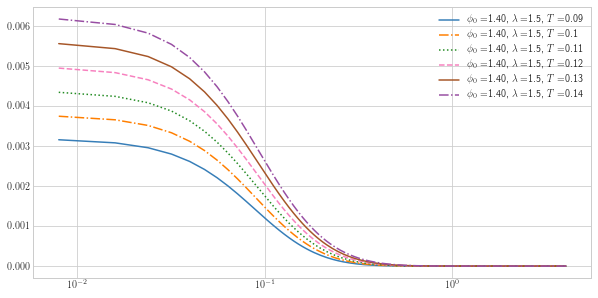

In [16]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
for tmp in range(len(tempList)):
    phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])

    aa, bb = 1, knyq-1
    plt.plot(klist[aa:bb], pspec(lamb, phi0, temp)[aa:bb], ls=lsl(tmp), label = labl(lamb, phi0, temp)) # th pow spec
plt.xscale('log')
plt.legend(); plt.show()

In [17]:
if False:
    choose = random.sample(np.arange(4000).tolist(), 4)
    for sim in choose:
        fig, ax = plt.subplots(1,1, figsize = (10,5))
        for tmp in range(len(tempList)):
            phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
            exp_params = np.asarray([nLat, lamb, phi0, temp])

            if sim < 2000: minSim, maxSim = 0, 2000
            else: minSim, maxSim, sim = 2000, 4000, sim-2000

            ALL_toten = np.load(toten_tlist_file(*exp_params, minSim, maxSim))
            tlist, energy = ALL_toten[0], ALL_toten[1][sim]

            try: nnrg = np.argwhere(np.isnan(energy)).flatten()[0]
            except: nnrg = len(tlist)+1

            tcut, tencut = tlist[:nnrg], energy[:nnrg]
            tencut = dx * phi0**2. * (tencut - tencut[0]) / tencut[0]
            plt.plot(tcut, tencut, label=labl(lamb, phi0, temp))
        plt.legend(title='Sim='+str(sim))
        plt.show()


In [18]:
if False:
    for tmp in range(len(tempList)):
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])
        labs = labl(lamb, phi0, temp)
        
        minSim = 2000

        ALL_toten = np.load(toten_tlist_file(*exp_params, minSim, maxSim))
        ALL_emt   = np.load(emt_tlist_file(*exp_params, minSim, maxSim))

        tlist, enfld, emtfld  = ALL_toten[0], ALL_toten[1], ALL_emt[1]

        fig2, ax = plt.subplots(1, 1, figsize=(7, 3.5))
        for sim, (momentum, energy) in enumerate(zip(emtfld, enfld)):
            if sim!=0: continue

            try: nnrg = np.argwhere(np.isnan(energy)).flatten()[0]
            except: nnrg = len(tlist)+1

            tcut, emtcut, tencut = tlist[:nnrg], momentum[:nnrg], energy[:nnrg]
            emtcut = dx * m2(lamb)**0.5 * phi0**2. * (emtcut - emtcut[0]) / emtcut[0]
            tencut = dx * m2(lamb)**0.5 * phi0**2. * (tencut - tencut[0]) / tencut[0]

            ax.plot(tcut, tencut, label=(r'$T^{00}$' if sim==0 else None))
            ax.plot(tcut, emtcut, label=(r'$T^{0x}$' if sim==0 else None))

        ax.set_xlabel(r'$\phi_0^{-1} \sqrt{V_0} \; t$')
        ax.set_ylabel(r'$T^{00}, \; T^{0x}$')
        ax.legend(title=labs); ax.grid(ls=':', color='darkgray', alpha=0.3)
        ax.set_title(labs)
        fig2.show()

In [19]:
allcolors = ['#377eb8', '#ff7f00', 'forestgreen', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']


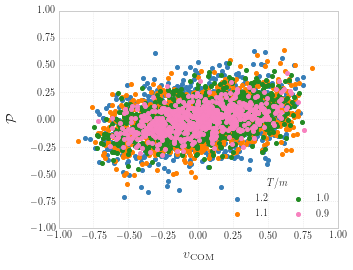

In [20]:
if True:
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))
    allcs = cycle(allcolors)
    for tmp in reversed(range(len(tempList))):
        if tmp>3: continue

        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])
        labss = r'${}$'.format(round(temp/np.sqrt(m2(lamb)),1))#labl(lamb, phi0, temp)
        col = next(allcs)

        veldata = np.array(np.load(velocities_file(*exp_params)))
        simvels, all_vels = veldata[:,0].astype(int), veldata[:,1]

        ALL_emt1 = np.load(emt_tlist_file(*exp_params, minSim, 2000))
        ALL_emt2 = np.load(emt_tlist_file(*exp_params, 2000, maxSim))
        emtfld = np.concatenate((ALL_emt1[1], ALL_emt2[1]), axis=0)
        initemt    = emtfld[simvels,0]

        #emtfld = np.load(stdemt0_tlist_file(*exp_params, minSim, maxSim))
        #initemt    = emtfld[simvels]

        ax.plot(all_vels, -initemt, marker='o', ms=4, linestyle='None', label=labss, color=col)
    
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.legend(title=r'$T/m$', loc='best', ncol=2)
    ax.set_xlabel(r'$v_{\rm COM}$')
    ax.set_ylabel(r'$\mathcal{P}$')
    ax.grid(ls=':', color='darkgray', alpha=0.3)
    fig.show()


[ 0.18583269 -0.00668639]
[ 0.18248509 -0.00590275]
[0.18450292 0.00386879]


No handles with labels found to put in legend.


[0.18669835 0.00104476]


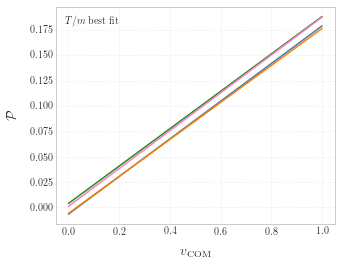

In [21]:
if True:
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))
    allcs = cycle(allcolors)
    for tmp in reversed(range(len(tempList))):
        if tmp>3: continue

        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])
        labss = r'${}$'.format(round(temp/np.sqrt(m2(lamb)),1))#labl(lamb, phi0, temp)
        col = next(allcs)

        veldata = np.array(np.load(velocities_file(*exp_params)))
        simvels, all_vels = veldata[:,0].astype(int), veldata[:,1]

        ALL_emt1 = np.load(emt_tlist_file(*exp_params, minSim, 2000))
        ALL_emt2 = np.load(emt_tlist_file(*exp_params, 2000, maxSim))
        emtfld = np.concatenate((ALL_emt1[1], ALL_emt2[1]), axis=0)
        initemt    = emtfld[simvels,0]

        # fit a straight line
        jfit_times = np.polyfit(all_vels, -initemt, deg=1)
        print(jfit_times)
        vlist = np.linspace(0., 1, 100)
        ax.plot(vlist, get_line(vlist, *jfit_times), '-', color=col)

    ax.legend(title=r'$T/m {\rm \; best \; fit}$', loc='best', ncol=2)
    ax.set_xlabel(r'$v_{\rm COM}$')
    ax.set_ylabel(r'$\mathcal{P}$')
    ax.grid(ls=':', color='darkgray', alpha=0.3)
    fig.show()


In [22]:
if False:
   # for tmp in reversed(range(len(tempList))):
    for tmp in reversed(range(len(tempList))):
        if tmp>3: continue
        
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        path = decay_times_file(*exp_params, minSim, maxSim, nTimeMAX)
        if os.path.exists(path):
            print(path)
            decay_times = np.load(path)

            minDecTime = nLat*2//3
            alltimes   = decay_times[:,1]
            simList2Do = decay_times[alltimes>=minDecTime, 0]

            all_vels = []
            for sim in simList2Do:
                path2RESTsim = rest_sim_location(*exp_params, sim)
                if os.path.exists(path2RESTsim):

                    sim, bubble, totbeta = np.load(path2RESTsim)
                    all_vels.append(np.array([sim, totbeta]))

        np.save(velocities_file(*exp_params), all_vels)
        print(len(all_vels), len(simList2Do))
        print('Done!')

0.12 854
0.11 1266
0.1 1191
0.09 654


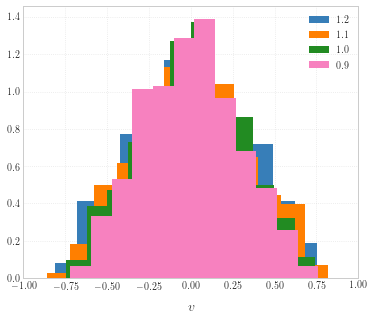

In [23]:
if True:
    fig2, ax = plt.subplots(1, 1, figsize=(6, 5))
    plt.grid(True, ls=':', alpha=0.5)
    for tmp in reversed(range(len(tempList))):
        if tmp>3: continue
    
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])
        labss = r'${}$'.format(round(temp/np.sqrt(m2(lamb)),1))#labl(lamb, phi0, temp)

        veldata = np.load(velocities_file(*exp_params))
     
        simvels, all_vels = veldata[:,0].astype(int), veldata[:,1]
        print(temp, len(simvels))
        plt.hist(all_vels, bins=12, label=labss, density=True)
    plt.xlim((-1,1))
    plt.legend(title=r'$T/m$', ncol=1, loc='best')
    plt.xlabel(r'$v$')
    plt.legend()
    plt.show()